# GAN

### Abstract

Adversarial process를 통한 generative model를 제안

* Generative Model (as G) : Discriminative Model이 구별하지 못하도록 Training data 분포에 모사하는 모델
* Discriminative Model (as D) : Sample 데이터가 G로부터 나온 것이 아닌 실제 데이터인지 판별하는 모델
  * D가 G가만든 데이터분포인지, Training data 분포인지 판별하는 확률은 1/2

* G, D는 multilayer Perceptron으로 이루어져 있고 backporpagation으로 훈련함
* 저자들은 이 모델을 minimax two-player game으로 비유함

* 제안한 모델은 Markov Chains 혹은 unrolled approximate inference network가 필요 없음



### Introduction

* 이전 고차원의 방대한 센싱 데이터를 클래스 레이블에 mapping해서 구분하는 모델을 썼는데,이 모델이 큰 성공을 거둘 수 잇는 이유가 well-behaved gradient를 갖는 선형 함수들을 사용한 backpropagation,  dropout 알고리즘을 베이스로 했기 때문

* 기존 Deep Generative Model들이 impact를 가지지 못한 이유는 다음과 같음
  1. maximum likelihood estimation, 관련된 전략들에서 근사하는 많은 다루기 어려운 확률계산들의 어려움
  1. Generative Context에서의 piecewise linear units의 이점들을 활용하는 것의 어려움

그래서 제안한 모델은 이러한 어려운 점들을 회피함

**Adversarial Nets framework**

* <u>Generative Model</u>은 해당 모델이 생성한 샘플인지, 아니면 실제 데이터 분포인지를 판별하기위해 학습하는 <u>Discriminative Model</u>과 적대하여 경쟁한다.
  * 저자들은 이를 위조화폐범(G)과 위조화폐범을 잡는 경찰(D)로 비유함
  * 위조화폐범(G)은 진짜 화폐같은 가짜 화폐를 만들어 내는 것을 목표로하고 경찰은 그 두개를 구별하는 것을 목표로함, 이렇게 경쟁하다보면 위조화폐범(G)은 진짜와 비슷한 화폐를 만들어 내므로 경찰(D)는 진짠지 가짠지 구분을 하기 어려워함 따라서 확률이 $\frac{1}{2}$ 로 된다0

* Multi-Layer Perceptron을 사용하면 backpropagation / dropout algorithms / forward propagation으로만 학습이 가능



### Adversarial Nets

Adversarial modeling Framework는 모델이 모두 Multi-layer Perceptrons일 때 가장 간단히 적용 가능함

분포 $P_g$를 $x$ (Training Data)에 대해서 학습시키기 위해서 input noise 변수에 대한 prior 분포인 $p_z(z)$ 를 정의함, 
또한 파라미터 $\theta _g$를 가지는 MLP(Multi-Layer Perceptron)로 표현된 미분 가능한 함수 $G(z;\theta _g)$ 라고 불리는 데이터 공간에 맵핑

그리고 $D(x;\theta _d)$ 라고 불리는 두번째 MLP를 선언했는데, 이 MLP는 single scalar를 출력함

$D(x)$는 $P_g$의 데이터가 아닌 진짜 데이터로부터 오는 $x$의 확률을 나타낸다

이 $D$는 실제 Train data와 $G$의 Sample 모두 올바른 label (G에서 생성한 데이터인지, 실제 데이터인지에 대한 label)를 판별(부여)할 확률을 최대화 하는 것을 목적으로 훈련함, 그리고 동시에 $G$도 $log(1-D(G(z)))$ 를 최소화 하도록 훈련함

위에 대한 내용을 수식화하면 다음과 같다.
$$
\underset{G}{\overset{}{\text{min\;}}}\underset{D}{\overset{}{\text{max}}}\;V(D,G) = \mathbb{E}_{x \sim p_{data}(x)}[\log D(x)] + \mathbb{E}_{z \sim p_{z}(z)}[\log(1-D(G(z)))]
$$

> 위 식에서 나올 수 있는 값은 $0$, $-\infin$ 인데 이는 $\log$의 그래프를 생각했을 때 알 수 있다.
>
> $\log 0$ 이나오면 나올 수 있는 값은 $-\infin$ 이고 $\log \ 1$ 이면 $0$ 이다. 즉 최댓값은 0이다.
>
> $D(d)$ 에서 $d$가 실제데이터라고 판별하면 1 이라고 판단한다. 그리고 그렇지 않다면 0 이라고 판별



이 수식에서는 2가지 관점으로 볼 수 있다.

1. **Generator의 관점**
   * G의 관점에서는 해당 수식을 가장 작게 만들어야한다, 즉 $-\infin$ 을 만들어내야함 
   * G의 경우 $\mathbb{E}_{x \sim p_{data}(x)}[\log D(x)]$ 식에 포함되지 않으므로 이 식은 무시됨
2. **Dicriminator의 관점**
   * D의 관점에서는 해당 수식을 크게 만들어야함, 즉 0 + 0으로 만들어내어 가장 큰 최댓값을 만들어야한다
   * 0 + 0을 만들기 위해선 $\log(1-D(G(z)))$ 에서 $D(G(z))$ 의 값을 0으로 만들어서 $\log 1$이 나오도록 함 



초기 학습에는 Generator가 멍청해서 실제 데이터보다 훨씬 동떨어진 것을 만들어내서 Discriminator는 명백하게 구분해낸다.

그때에 $\log(1-D(G(z)))$ 는 $D(G(z))$ 가 0으로 수렴하게 되므로 전체 식은 $\log 1$로 최종식이 나와 전체식은 0이 된다.

그리고 점점 Generator가 실제 data처럼 잘 만들어내게됨

![image-20220415145333319](./figure/%EC%A0%95%EB%A6%AC/image-20220415145333319.png)

> 검은선 : 실제 데이터 분포 $p_x$
>
> 초록선 : generative가 생성하는 데이터 분포 $p_g$
>
> 파란선 : Discriminative 가 모델링하는 조건부 확률 (sigmoid curve)
> $z$ : z가 균일하게 샘플링되는 도메인
>
> $x$ : x의 도메인

* (a) 초기 학습에서는 $z$ 를 보다시피 $x$의 도메인보다 훨씬 치우쳐진 영역에 분포가 생성됨을 볼 수 있고 Discriminator의 확률분포도 오락가락 함을 알 수 있음
* (b) 파란색 선이 들쑥날쑥하게 확률 판단하지 않고 가짜데이터와 진짜데이터를 분류함을 볼 수 있음
* (c) 초록색, 생성하는 데이터분포가 점점 실제 데이터 분포와 비슷하게 되어감
* (d) 최종적으로 데이터 생성분포와 실제 데이터 분포와 동일하게 되고, Discriminator가 구분하는 확률이 1/2로 수렴하게 됨 (일자)



### Theoretical Results

![image-20220415163316882](./figure/%EC%A0%95%EB%A6%AC/image-20220415163316882.png)

알고리즘은 이렇게 구성되어있다. 뭐 별거 없다 위에서 설명한 그대로 진행됨

1. m개의 데이터를 각각 $p_{data}(x)$와 $p_g(z)$에서 샘플링함
2. **k** steps 만큼 경사상승법을 통해서 Discriminator를 학습 -> D의 파라미터 업데이트
   * $V(G,D)$를 max가 되도록 학습
3. D의 학습이 끝난 후 m개의 데이터를 $p_g(z)$ 로부터 샘플링
4. G를 경사하강법을 통해서 학습 -> G의 파라미터 업데이트
   * $V(G,D)$를 min이 되도록 학습

> 왜 그런지는 위에 설명



#### Global Optimality of $p_g = p_{data}$

G가 어던 상태건 최적의 상태인 D가 있다고 가정

최적의 상태 D는 다음과 같이 식을 세움
$$
D^*_G(x)=\frac{p_{data}(x)}{p_{data}(x)+p_g(x)}
$$
  
G가 있을 때, D는 $V(G,D)$식을 최대로 만드는 것을 목표로함  
  
$$
V(G,D) = \int_{x}^{}p_{data}(x)\log(D(x)) + p_g(x)\log(1-D(x))dx
$$
  
(0,0) 이 아닌 (a,b)가 있을 때, $y \rightarrow a\log(y)+ b\log(1-y)$ 에서 $b\log(1-y)$ 가 최대일때 $y$값을 찾아야 해서 미분을 시행  

$$
\frac{a}{y} - \frac{b}{1-y} = 0  \ ,\quad a(1-y) -by = 0 \ , \quad y=\frac{a}{a+b} \\
$$
여기서 $ a = p_{data}(x) , b=p_g(x)$ 라 했을 때 $D^*_G(x)$ 의 식과 같다.

그래서 이 $V(G,D)$ 식에 $D$ 대신 $D^*_G(x)$ 식을 대입 --> $C(G)$를 유도  
  
$$
\begin{align}C(G) & = \underset{D}{\overset{}{\text{max}}}\;V(D,G) = \mathbb{E}_{x \sim p_{data}(x)}[\log D^*_G(x)] + \mathbb{E}_{z \sim p_{z}(z)}[\log(1-D^*_G(G(z)))] \\
& =\underset{D}{\overset{}{\text{max}}}\;V(D,G) = \mathbb{E}_{x \sim p_{data}(x)}\left[\log \frac{p_{data}(x)}{p_{data}(x)+p_g(x)}\right] + \mathbb{E}_{z \sim p_{z}(z)}\left[\frac{p_{g}(x)}{p_{data}(x)+p_g(x)}\right]\end{align}
$$
  
  
 $C(G)$가 global minimum을 가지려면 $p_{data}(x) = p_g(x)$ 를 만족해야함, 이때 만족하면 $-\log4$ 라는 global minimum을 가질 수 있음

 $p_{data}(x) = p_g(x)$  라고 가정하고 수식을 계산하면
   
   
$$
\begin{align}C(G) = & \log\frac{1}{2} + \log \frac{1}{2} = - \log4 \\
=&\mathbb{E}_{x \sim p_{data}(x)}\left[{-\log 2}\right] + \mathbb{E}_{z \sim p_{z}(z)}\left[{-\log2}\right] \\ =& -\log4\end{align}
$$

$$
\begin{align} 
C(G) =& C(G) + \log 4 - \log 4 \\
=& -\log 4 + KL \left(p_{data} ||  \frac{p_{data}+p_g}{2} \right) + KL \left(p_{g} ||  \frac{p_{data}+p_g}{2} \right) \\
=& -\log(4) + 2 \cdot JSD(p_{data} || p_g)
\end{align}
$$

KL은 쿨백-라이블러 발산 ---> 확률분포의 차이를 계산할 때 사용하는 것

JSD ---> 두 분포가 일치할 때만 **0**

--> 두분포가 일치해야 하므로 유일한 조건은 $p_{data} = p_g$ 임을 알 수 있음

따라서 두 분포가 같아야 global minimum을 얻을 수 있음



#### Convergence of Alogorithm 1

이건..이해못함





### Experiments

MNIST, TFD, CIFAR-10 데이터셋으로 학습시키고 테스트함

G의 활성화 함수는 ReLU와 Sigmoid 함수를 혼합사용하고 노이즈를 입력데이터로 받아서 생성

D는 maxout을 활성화함수로 사용

![image-20220415213534272](./figure/%EC%A0%95%EB%A6%AC/image-20220415213534272.png)

Parzen window 기반의 log 확률을 측정한 값들임

* 이 방식으로 확률을 측정하는 것은 분산이 조금 크고 이미지의 고차원 데이터 에서 좋은 효과를 내지 못하지만 저자의 지식으로 사용가능한 방식 중에서는 가장 좋은 방식이라고함

![image-20220415213629083](./figure/%EC%A0%95%EB%A6%AC/image-20220415213629083.png)

* 가장 우측에 있는 그림들이 진짜 데이터이고 나머지가 G 모델이 생성한 데이터이다



### Advantages and disadvantages

**Advantages**

* 마르코프체인이 필요없음
* backprop으로만으로도 gradient를 얻을 수 있음
* 훈련 도중에는 아무런 추론도 필요하지 않음
* 다양한 함수를 합칠 수 있음

##### Statistical advantage

* 오로지 D를 통해 통과하는 Gradients를 가지고, Data example(real data)를 가지고 업데이트되지않는 G 모델로부터 약간의 통계적 이점을 얻을 수 있음

  > 데이터 예제를 통해 직접적으로 업데이트 x, D를 통한 gradient 흐름으로만 가중치를 업데이트함으로써 통계적 이점을 얻음

* 다른 방법들은 체인이 mode들간에 혼합될 수 있도록 하는 과정에서 분포가 다소 blurry해지는 경향이 있는 반면 GAN은 sharp한 표현을 얻음 

  > 무슨뜻인지 잘 모르겠음

**disadvantages**

* 생성된 데이터의 분포를 확실하게 표현하는 것이 없다는 것

* 학습할 때 D와 G가 잘 동기화 되어야함 (한쪽이 더 많이 학습하는 일이 없도록 균등하게 학습)

  * G는 D의 update 없이 많이 training되면 G가 z 데이터를 너무 많이 붕괴시키기 때문에

  > G가 $p_{data}$의 분포를 따르는데 충분한 다양성을 지닐 수 없게 되어서 "Helvetica scenario"에 빠짐 --> 원하는 G를 못얻음



### Conclusion

* Conditional generative model
* Learned approximate inference
* Semi-Supervised Learning
* Efficiency improvements


### References
* [Review1](https://tobigs.gitbook.io/tobigs/deep-learning/computer-vision/gan-generative-adversarial-network#7.-conclusions-and-future-work)
* [Review2](https://velog.io/@changdaeoh/Generative-Adversarial-Nets-GAN)
* [Review3](https://velog.io/@minkyu4506/%EB%85%BC%EB%AC%B8%EB%A6%AC%EB%B7%B0GANGenerative-Adversarial-Nets-%EB%A6%AC%EB%B7%B0)
* [Review4](https://lifeignite.tistory.com/53)
* [Review5](https://m.blog.naver.com/euleekwon/221557899873)
* [GAN 논문 원문](https://arxiv.org/abs/1406.2661)


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device("cuda" if is_cuda else "cpu")

In [3]:
device # RTX 3080 ti

device(type='cuda')

In [4]:
standardizator = transforms.Compose([
    transforms.ToTensor(),
    
    # (0.5,0.5,0.5),(0.5,0.5,0.5)를 했을 때 에러가 나서 위와 같이 바꿈 (Gray Scale만 norm 함)
    # transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    
    transforms.Normalize((0.5,),(0.5,)) 
])

In [5]:
train_data = dsets.MNIST(root="./data", train=True, transform = standardizator, download = True)
test_data = dsets.MNIST(root="./data", train=False, transform = standardizator, download = True)

In [13]:
batch_size = 200
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size, shuffle=True)
test_data_loader  = torch.utils.data.DataLoader(test_data, batch_size, shuffle=True)

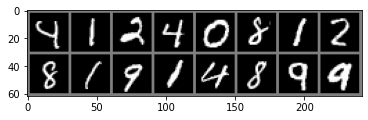

In [7]:
import numpy as np
from matplotlib import pyplot as plt

def imshow(img):
    img = (img+1)/2
    img = img.squeeze()
    np_img = img.numpy()
    plt.imshow(np_img, cmap='gray')
    plt.show()

def imshow_grid(img):
    img = utils.make_grid(img.cpu().detach())
    img = (img+1)/2
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

example_mini_batch_img, example_mini_batch_label = next(iter(train_data_loader))
imshow_grid(example_mini_batch_img[0:16,:,:])

#### MLP 로 GAN 구현

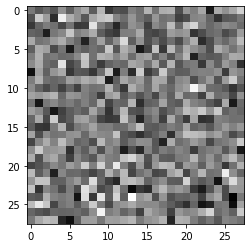

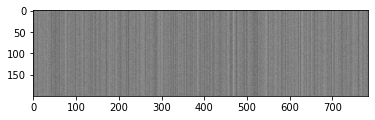

In [8]:
# Generator 구현

d_noise = 100
d_hidden = 256

def sample_z(batch_size=1, d_noise=100):
    return torch.randn(batch_size, d_noise, device=device)

G = nn.Sequential(
    nn.Linear(d_noise, d_hidden),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(d_hidden,d_hidden),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(d_hidden, 28*28),
    nn.Tanh()
).to(device)

# Create Noise
z = sample_z()
# Create Fake Img
img_fake = G(z).view(-1,28,28)
# Print img
imshow(img_fake.squeeze().cpu().detach())

# Batch Size만큼 노이즈 생성해서 그리드 출력
z = sample_z(batch_size)
img_fake = G(z)
imshow_grid(img_fake)

학습 전이라 의미 없는 데이터 만들어냄

In [9]:
# Dicriminator
D = nn.Sequential(
    nn.Linear(28*28, d_hidden),
    nn.LeakyReLU(),
    nn.Dropout(0.1),
    nn.Linear(d_hidden, d_hidden),
    nn.LeakyReLU(),
    nn.Dropout(0.1),
    nn.Linear(d_hidden, 1),
    nn.Sigmoid()
).to(device)

print(G(z).shape)
print(D(G(z)).shape)
print(D(G(z)[0:5]).transpose(0,1))

torch.Size([200, 784])
torch.Size([200, 1])
tensor([[0.4972, 0.4954, 0.5008, 0.4926, 0.4978]], device='cuda:0',
       grad_fn=<TransposeBackward0>)


In [18]:
criterion = nn.BCELoss()

def run_epoch(generator, discriminator, _optimizer_g, _optimizer_d):

    generator.train()
    discriminator.train()

    for img_batch, label_batch in train_data_loader:
        img_batch, label_batch = img_batch.to(device), label_batch.to(device)

        # init optimizer
        _optimizer_d.zero_grad()

        p_real = discriminator(img_batch.view(-1,28*28))
        p_fake = discriminator(generator(sample_z(batch_size, d_noise)))

        loss_real = -1*torch.log(p_real)
        loss_fake = -1*torch.log(1.-p_fake) # ?

        loss_d = (loss_real + loss_fake).mean()

        # Update parameters
        loss_d.backward() #backprop
        _optimizer_d.step()

        # init optimizer
        _optimizer_g.zero_grad()
        p_fake = discriminator(generator(sample_z(batch_size,d_noise))) # D(G(z))

        loss_g = -1 * torch.log(p_fake).mean()
        loss_g.backward() #backprop
        #update parameter
        _optimizer_g.step()

In [19]:
def evaluate_model(generator, discriminator):
    p_real, p_fake = 0., 0.

    generator.eval()
    discriminator.eval()

    for img_batch, label_batch in test_data_loader:
        img_batch, label_batch = img_batch.to(device), label_batch.to(device)

        with torch.autograd.no_grad():
            p_real += (torch.sum(discriminator(img_batch.view(-1, 28*28))).item())/10000.
            p_fake += (torch.sum(discriminator(generator(sample_z(batch_size, d_noise)))).item())/10000.

    return p_real, p_fake

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch 50/200 | p_real: 0.814784, p_g: 0.300259


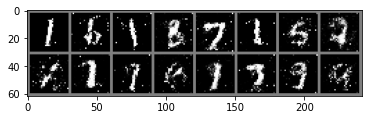

Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch 100/200 | p_real: 0.693862, p_g: 0.378836


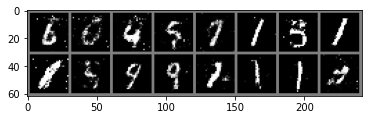

Epoch: 100
Epoch: 101
Epoch: 102
Epoch: 103
Epoch: 104
Epoch: 105
Epoch: 106
Epoch: 107
Epoch: 108
Epoch: 109
Epoch: 110
Epoch: 111
Epoch: 112
Epoch: 113
Epoch: 114
Epoch: 115
Epoch: 116
Epoch: 117
Epoch: 118
Epoch: 119
Epoch: 120
Epoch: 121
Epoch: 122
Epoch: 123
Epoch: 124
Epoch: 125
Epoch: 126
Epoch: 127
Epoch: 128
Epoch: 129
Epoch: 130
Epoch: 131
Epoch: 132
Epoch: 133
Epoch: 134
Epoch: 135
Epoch: 136
Epoch: 137
Epoch: 138
Epoch: 139
Epoch: 140
Epoch: 141
Epoch: 142
Epoch: 143
Epoch: 144
Epoch: 145
Epoch: 146
Epoch: 147
Epoch: 148
Epoch: 149
Epoch 150/200 | p_real: 0.640993, p_g: 0.339435


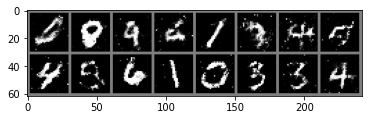

Epoch: 150
Epoch: 151
Epoch: 152
Epoch: 153
Epoch: 154
Epoch: 155
Epoch: 156
Epoch: 157
Epoch: 158
Epoch: 159
Epoch: 160
Epoch: 161
Epoch: 162
Epoch: 163
Epoch: 164
Epoch: 165
Epoch: 166
Epoch: 167
Epoch: 168
Epoch: 169
Epoch: 170
Epoch: 171
Epoch: 172
Epoch: 173
Epoch: 174
Epoch: 175
Epoch: 176
Epoch: 177
Epoch: 178
Epoch: 179
Epoch: 180
Epoch: 181
Epoch: 182
Epoch: 183
Epoch: 184
Epoch: 185
Epoch: 186
Epoch: 187
Epoch: 188
Epoch: 189
Epoch: 190
Epoch: 191
Epoch: 192
Epoch: 193
Epoch: 194
Epoch: 195
Epoch: 196
Epoch: 197
Epoch: 198
Epoch: 199
Epoch 200/200 | p_real: 0.600275, p_g: 0.324748


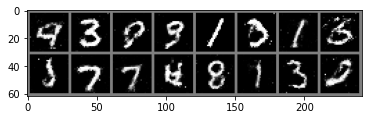

In [21]:
def init_params(model):
    for p in model.parameters():
        if(p.dim() > 1):
            nn.init.xavier_normal_(p)
        else:
            nn.init.uniform_(p, 0.1, 0.2)

init_params(G)
init_params(D)

optimizer_g = optim.Adam(G.parameters(), lr=0.0002)
optimizer_d = optim.Adam(D.parameters(), lr=0.0002)

p_real_trace = []
p_fake_trace = []

for epoch in range(200):
    run_epoch(G, D, optimizer_g, optimizer_d)
    p_real, p_fake = evaluate_model(G,D)

    p_real_trace.append(p_real)
    p_fake_trace.append(p_fake)
    print("Epoch:",epoch)
    if ((epoch+1)% 50 == 0):
        print("Epoch %i/200 | p_real: %f, p_g: %f" % (epoch+1, p_real, p_fake))
        imshow_grid(G(sample_z(16)).view(-1,1,28,28))

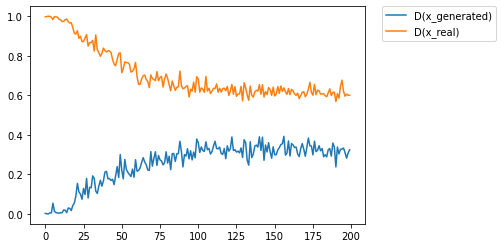

In [23]:
plt.plot(p_fake_trace, label="D(x_generated)")
plt.plot(p_real_trace, label="D(x_real)")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

# --> 0.5

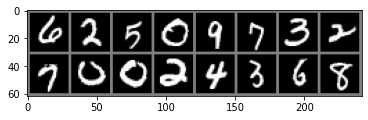

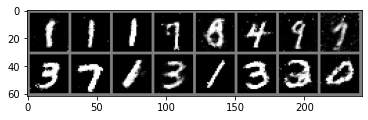

In [24]:
vis_loader = torch.utils.data.DataLoader(test_data,16,True)

img_vis, label_vis = next(iter(vis_loader))
imshow_grid(img_vis) # 실제 데이터

imshow_grid(G(sample_z(16,100)).view(-1,1,28,28)) # G가 만들어낸 이미지

### References
[GAN Tutorial Blog](https://ws-choi.github.io/blog-kor/seminar/tutorial/mnist/pytorch/gan/GAN-%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC/)